### CUSMTOMER SEGMENTATION

In [140]:
!pip install plotly

In [141]:
# importing the required packages
import numpy as np                                #numpy for numerical computing
import pandas as pd                               #pandas for data manipulation and analysis
import matplotlib.pyplot as plt                   #matplotlib for visualization
import seaborn as sns                             #seaborn for statistical graphics
import plotly as py                               #plotly for web-based visualizations
import plotly.graph_objs as go
from sklearn.cluster import KMeans                #kmeans algorithm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", size=14) #sets the default font size for matplotlib plots


In [142]:
# read the csv 
df = pd.read_excel("data.xlsx")
df.head()                        # print the first 5 rows

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product
0,1.0,15.0,39.0,Mtwara,Mtindi 500ml
1,2.0,15.0,81.0,Zanzibar City,Fresh Milk 250ml
2,3.0,16.0,6.0,Mtwara,Mtindi 500ml
3,4.0,16.0,77.0,Zanzibar City,Fresh Milk 250ml
4,5.0,17.0,40.0,Mtwara,Mtindi 500ml


In [143]:
df.rename(columns={
                   'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Most Purchased Product': 'Most_Purchased_Product'
                  }, 
                   inplace=True # modify the DataFrame itself in-place, without creating a new DataFrame
          )

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Merchant Id             200 non-null    float64
 1   Annual_Revenue          200 non-null    float64
 2   Spending_Score          200 non-null    float64
 3   City                    200 non-null    object 
 4   Most_Purchased_Product  200 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.9+ KB


In [145]:
df.describe() #used to generate descriptive statistics of a pandas DataFrame

,Merchant Id,Annual_Revenue,Spending_Score
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [146]:
df['City'].value_counts()  # to count the occurrences of each unique value in the 'City' column 

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

In [147]:
df['Annual_Revenue'].value_counts()

54.0     12
78.0     12
48.0      6
71.0      6
63.0      6
         ..
58.0      2
59.0      2
16.0      2
64.0      2
137.0     2
Name: Annual_Revenue, Length: 64, dtype: int64

In [148]:
df['Annual_Revenue'].value_counts()

54.0     12
78.0     12
48.0      6
71.0      6
63.0      6
         ..
58.0      2
59.0      2
16.0      2
64.0      2
137.0     2
Name: Annual_Revenue, Length: 64, dtype: int64

In [149]:
#Looking for null values
df.isna().sum()             #isna is is null function,returns ture if there is null values

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
dtype: int64

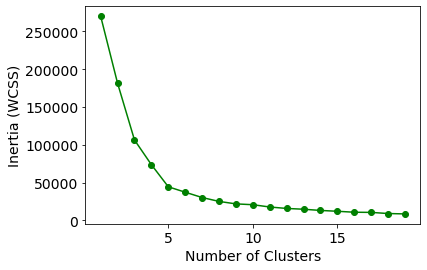

In [150]:
# Selecting the features for clustering ,through slicing
X = df.loc[:,["Annual_Revenue", "Spending_Score"]]

# Creating an empty list to store the sum of squared errors (SSE)
SSE = []

# Define the range of values for the number of clusters
k = range(1, 20)

# Iterate over the range of values for the number of clusters
for i in k:
    # Create an instance of KMeans with the current number of clusters
    means_k = KMeans(n_clusters=i, random_state=0)
    
    # Fit the KMeans model to the data
    means_k.fit(X)
    
    # Append the sum of squared errors (inertia) to the SSE list
    SSE.append(means_k.inertia_)

# Plotting the elbow curve
plt.plot(k, SSE, 'go-')  # Plotting the number of clusters (k) vs SSE (inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')  # Within-Cluster Sum of Squares
plt.show()


In [151]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)   # from the above plot the elbow value is 5
y_kmeans = kmeans.fit_predict(X)           # assignsing cluster values to data points
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [152]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [153]:
len(y_kmeans)

200

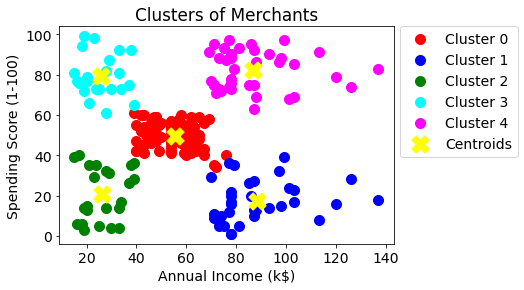

In [154]:
# Visualize the clusters based on 'Annual_Revenue' and 'Spending_Score' using scatter plot
# Scatter plot for Cluster 0
plt.scatter(X[y_kmeans == 0]['Annual_Revenue'], X[y_kmeans == 0]['Spending_Score'], s=100, c='red', label='Cluster 0')

# Scatter plot for Cluster 1
plt.scatter(X[y_kmeans == 1]['Annual_Revenue'], X[y_kmeans == 1]['Spending_Score'], s=100, c='blue', label='Cluster 1')

# Scatter plot for Cluster 2
plt.scatter(X[y_kmeans == 2]['Annual_Revenue'], X[y_kmeans == 2]['Spending_Score'], s=100, c='green', label='Cluster 2')

# Scatter plot for Cluster 3
plt.scatter(X[y_kmeans == 3]['Annual_Revenue'], X[y_kmeans == 3]['Spending_Score'], s=100, c='cyan', label='Cluster 3')

# Scatter plot for Cluster 4
plt.scatter(X[y_kmeans == 4]['Annual_Revenue'], X[y_kmeans == 4]['Spending_Score'], s=100, c='magenta', label='Cluster 4')

# Plot the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='yellow', label='Centroids')

# Set the title of the plot
plt.title('Clusters of Merchants')

# Set the label for the x-axis
plt.xlabel('Annual Income (k$)')

# Set the label for the y-axis
plt.ylabel('Spending Score (1-100)')

# Place the legend outside the plot area at the specified position
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Display the plot
plt.show()



In [155]:
# cluster 0 avarage income and average spending score(RED)
# cluster 1 high income and low spending score(BLUE)
# cluster 2 low income and low spending score(green)
# cluster 3 low income and high spending score(cyan)
# cluster 4 high income and high spending score

In [156]:
print(centroids)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [157]:
df.loc[:,"Cluster_Number"] = y_kmeans # adding the column "cluster_number" to DF,using .loc function

In [158]:
Cluster_Nature = []

for row in df['Cluster_Number']:
    if row == 0: 
        Cluster_Nature.append('General') # avg income and avg spending score
        
    elif row == 1: 
        Cluster_Nature.append('Miser') # high income ,low spending score
        
    elif row == 2: 
        Cluster_Nature.append('Careful') # low income, low spending score (poor)
        
    elif row == 3: 
        Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
        
    elif row == 4:  
        Cluster_Nature.append('Target')  # high income , high spending score
        
    else: Cluster_Nature.append('Outlier')

df['Cluster_Nature'] = Cluster_Nature


In [159]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1.0,15.0,39.0,Mtwara,Mtindi 500ml,2,Careful
1,2.0,15.0,81.0,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
2,3.0,16.0,6.0,Mtwara,Mtindi 500ml,2,Careful
3,4.0,16.0,77.0,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
4,5.0,17.0,40.0,Mtwara,Mtindi 500ml,2,Careful


In [160]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Merchant Id             200 non-null    float64
 1   Annual_Revenue          200 non-null    float64
 2   Spending_Score          200 non-null    float64
 3   City                    200 non-null    object 
 4   Most_Purchased_Product  200 non-null    object 
 5   Cluster_Number          200 non-null    int32  
 6   Cluster_Nature          200 non-null    object 
dtypes: float64(3), int32(1), object(3)
memory usage: 10.3+ KB


In [161]:
df['Cluster_Nature'].value_counts()

General        81
Target         39
Miser          35
Careful        23
Spendthrift    22
Name: Cluster_Nature, dtype: int64

In [162]:
target_df = df.loc[df['Cluster_Nature'] == 'Target'] # creating a DF with cluster nature = target

In [163]:
target_df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
123,124.0,69.0,91.0,Dar es Salaam,Mtindi 250ml,4,Target
125,126.0,70.0,77.0,Dar es Salaam,Mtindi 250ml,4,Target
127,128.0,71.0,95.0,Dar es Salaam,Mtindi 250ml,4,Target
129,130.0,71.0,75.0,Dar es Salaam,Mtindi 250ml,4,Target
131,132.0,71.0,75.0,Dar es Salaam,Mtindi 250ml,4,Target


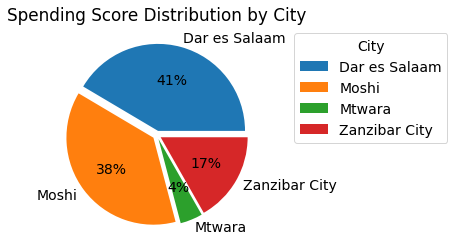

In [164]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05)

city_spending = df.groupby(['City'])['Spending_Score'].sum()

plt.pie(city_spending, labels=city_spending.index, autopct='%1.0f%%', explode=explode)
plt.title('Spending Score Distribution by City')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 1),title='City', loc='upper left')
plt.show()

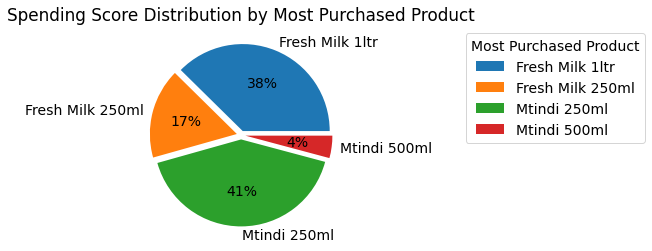

In [165]:
explode = (0.05, 0.05, 0.05, 0.05)

product_spending = df.groupby(['Most_Purchased_Product'])['Spending_Score'].sum()

plt.pie(product_spending, labels=product_spending.index, autopct='%1.0f%%', explode=explode)
plt.title('Spending Score Distribution by Most Purchased Product')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.5, 1),title='Most Purchased Product', loc='upper left')
plt.show()


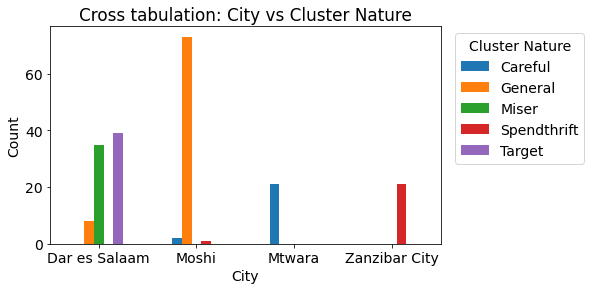

In [166]:
# Cross tabulation between City and Cluster  Nature
CrosstabResult = pd.crosstab(index=df['City'], columns=df['Cluster_Nature'])

CrosstabResult.plot(kind='bar', figsize=(7, 4), rot=0)
plt.title('Cross tabulation: City vs Cluster Nature')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Cluster Nature', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


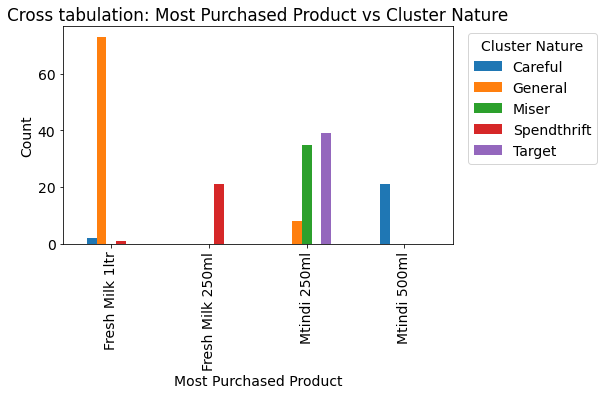

In [167]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult = pd.crosstab(index=df['Most_Purchased_Product'], columns=df['Cluster_Nature'])

CrosstabResult.plot(kind='bar', figsize=(7, 4))
plt.title('Cross tabulation: Most Purchased Product vs Cluster Nature')
plt.xlabel('Most Purchased Product')
plt.ylabel('Count')
plt.legend(title='Cluster Nature', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


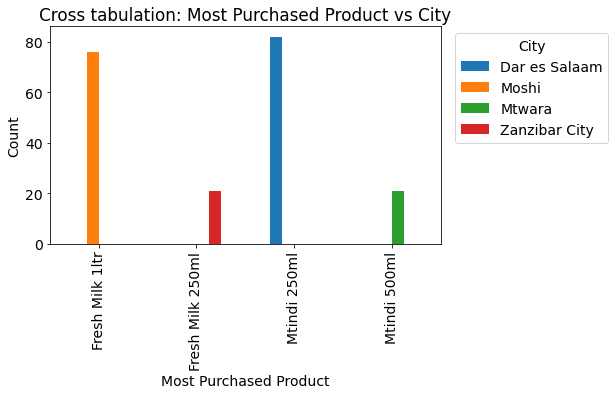

In [168]:
# Create a cross-tabulation between 'Most_Purchased_Product' and 'City'
CrosstabResult = pd.crosstab(index=df['Most_Purchased_Product'], columns=df['City'])

# Plot a grouped bar chart
CrosstabResult.plot(kind='bar', figsize=(7, 4))

# Set the title of the plot
plt.title('Cross tabulation: Most Purchased Product vs City')

# Set the label for the x-axis
plt.xlabel('Most Purchased Product')

# Set the label for the y-axis
plt.ylabel('Count')

# Add a legend with the title 'City' and adjust its position
plt.legend(title='City', bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()



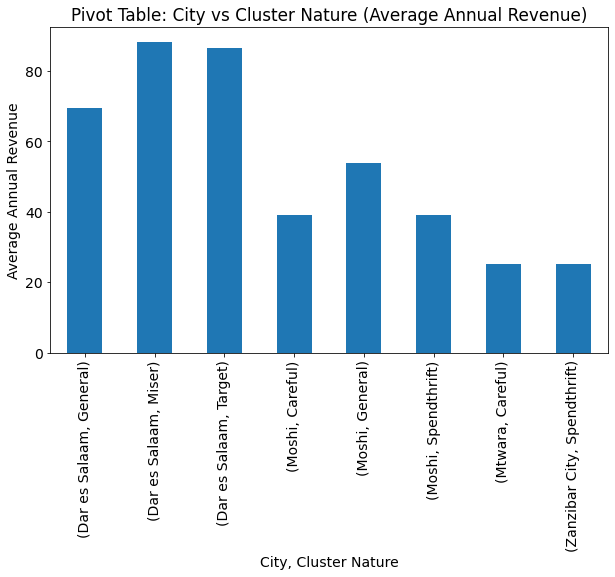

In [170]:
# Create a pivot table to calculate the mean of 'Annual_Revenue' based on the index values 'City' and 'Cluster_Nature'
table = pd.pivot_table(df, index=['City', 'Cluster_Nature'], aggfunc={'Annual_Revenue': np.mean})

# Plot a bar chart using the pivot table data, setting the figure size to (10, 6)
table.plot(kind='bar', figsize=(10, 6))

# Set the title of the plot
plt.title('Pivot Table: City vs Cluster Nature (Average Annual Revenue)')

# Set the label for the x-axis
plt.xlabel('City, Cluster Nature')

# Set the label for the y-axis
plt.ylabel('Average Annual Revenue')

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Remove the legend from the plot
plt.legend().remove()

# Display the plot
plt.show()


In [178]:
weights = {
    'Annual_Revenue': 0.4,
    'Spending_Score': 0.3,
    'City': 0.1,
    'Most_Purchased_Product': 0.2
}
df.loc[:,"Credit_Score"]
df.loc[:,"Credit_Category"]
# Normalize numerical features
scaler = MinMaxScaler()
df[['Annual_Revenue', 'Spending_Score']] = scaler.fit_transform(df[['Annual_Revenue', 'Spending_Score']])

# Calculate credit score
df['Credit_Score'] = (
    df['Annual_Revenue'] * weights['Annual_Revenue'] +
    df['Spending_Score'] * weights['Spending_Score'] +
    df['City'].map(df.groupby('City')['Cluster_Number'].mean()) * weights['City'] +
    df['Most_Purchased_Product'].map(df.groupby('Most_Purchased_Product')['Cluster_Number'].mean()) * weights['Most_Purchased_Product']
)

# Optional: Define credit score categories
def get_credit_category(score):
    if score >= 0.8:
        return 'Excellent'
    elif score >= 0.6:
        return 'Good'
    elif score >= 0.4:
        return 'Fair'
    else:
        return 'Poor'

df['Credit_Category'] = df['Credit_Score'].apply(get_credit_category)

# Display the resulting credit scores
print(df[['Merchant Id', 'Credit_Score', 'Credit_Category']])

     Merchant Id  Credit_Score Credit_Category
0            1.0      0.716327            Good
1            2.0      1.144898       Excellent
2            3.0      0.618585            Good
3            4.0      1.135932       Excellent
4            5.0      0.725945            Good
..           ...           ...             ...
195        196.0      1.281818       Excellent
196        197.0      1.145368       Excellent
197        198.0      1.286184       Excellent
198        199.0      1.150821       Excellent
199        200.0      1.349801       Excellent

[200 rows x 3 columns]


In [189]:
df.head(10)

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature,Credit_Score,Credit_Category
0,1.0,0.000000,0.387755,Mtwara,Mtindi 500ml,2,Careful,0.716327,Good
1,2.0,0.000000,0.816327,Zanzibar City,Fresh Milk 250ml,3,Spendthrift,1.144898,Excellent
2,3.0,0.008197,0.051020,Mtwara,Mtindi 500ml,2,Careful,0.618585,Good
3,4.0,0.008197,0.775510,Zanzibar City,Fresh Milk 250ml,3,Spendthrift,1.135932,Excellent
4,5.0,0.016393,0.397959,Mtwara,Mtindi 500ml,2,Careful,0.725945,Good
5,6.0,0.016393,0.765306,Zanzibar City,Fresh Milk 250ml,3,Spendthrift,1.136149,Excellent
6,7.0,0.024590,0.051020,Mtwara,Mtindi 500ml,2,Careful,0.625142,Good
7,8.0,0.024590,0.948980,Zanzibar City,Fresh Milk 250ml,3,Spendthrift,1.194530,Excellent
8,9.0,0.032787,0.020408,Mtwara,Mtindi 500ml,2,Careful,0.619237,Good
9,10.0,0.032787,0.724490,Zanzibar City,Fresh Milk 250ml,3,Spendthrift,1.130462,Excellent


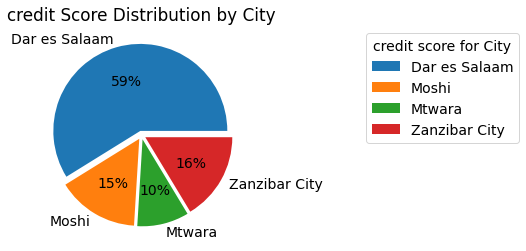

In [187]:
explode = (0.05, 0.05, 0.05, 0.05)

product_spending = df.groupby(['City'])['Credit_Score'].sum()

plt.pie(product_spending, labels=product_spending.index, autopct='%1.0f%%', explode=explode)
plt.title('credit Score Distribution by City')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.5, 1),title='credit score for City', loc='upper left')
plt.show()

In [190]:
# saving the final analyzed data to a csv file.
df.to_csv('analyzed_file.csv')